In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

[Text(0.5, 0, 'x0'), Text(0, 0.5, 'x1')]

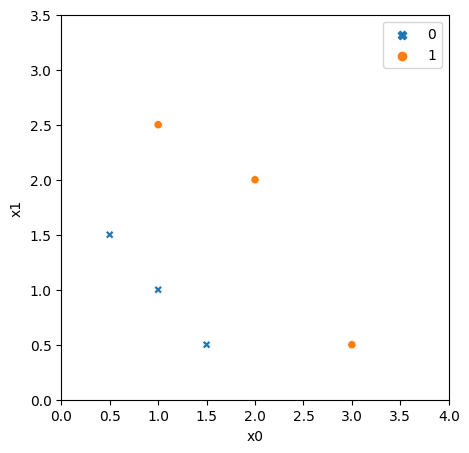

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis([0, 4, 0, 3.5])
markers = {0: 'X', 1: 'o'}
plot = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y, style=y, markers=markers, ax = ax)
plot.set(xlabel ="x0", ylabel = "x1")

In [4]:
def compute_loss(x, y, w, b):
    z = np.sum(np.dot(w, x)) + b
    f_wb = 1/(1 + np.exp(-z))
    loss = y*np.log(f_wb) + (1-y)*np.log(1-f_wb)
    
    return loss

In [5]:
def compute_cost(x, y, w, b):
    i = 0
    m = len(y)
    cost = 0
    
    for i in range(m):
        loss = compute_loss(x[i], y[i], w, b)
        cost += loss
        
    total_cost = cost * (-1/m) 
    
    return total_cost

In [6]:
def compute_gradiant(x, y, w, b):
    m, n = x.shape
    dj_w = np.zeros((n,))
    dj_b = 0.
    
    for i in range(m):
        z = np.dot(x[i], w) + b
        f_wb = 1/(1 + np.exp(-z))
        dj_w_i = (f_wb - y[i]) * x[i]
        dj_b_i = f_wb - y[i]
        dj_w += dj_w_i
        dj_b += dj_b_i
    
    dj_w /= m
    dj_b /= m
    return dj_w, dj_b

In [7]:
def gradiant_descent(x, y, w, b, alpha, iterations):
    
    for i in range(iterations):
        dj_w, dj_b = compute_gradiant(x, y, w, b)
        w = w - (alpha * dj_w)
        b = b - (alpha * dj_b)
        
        cost = compute_cost(x, y, w, b)
        if i%1000 == 0:
            print(f"w:{w}, b:{b}, Cost:{cost}, iteration:{i}")
            
    return w, b

In [8]:
w_tmp = np.zeros_like(X[0])
b_tmp = 0.
alpha = 0.1
iterations = 10000
w, b = gradiant_descent(X, y, w_tmp, b_tmp, alpha, iterations)

w:[0.025      0.01666667], b:0.0, Cost:0.6846104685605738, iteration:0
w:[2.30572624 2.07740353], b:-5.910993301906599, Cost:0.1590977666870457, iteration:1000
w:[3.15508984 2.94023038], b:-8.311492289992747, Cost:0.08460064176930078, iteration:2000
w:[3.68092411 3.47097047], b:-9.782304238535813, Cost:0.05705327279402531, iteration:3000
w:[4.06024975 3.8527842 ], b:-10.83864078095771, Cost:0.04290759421682, iteration:4000
w:[4.35647898 4.15050189], b:-11.661537885653816, Cost:0.034338477298845566, iteration:5000
w:[4.59929949 4.39430614], b:-12.334999960928222, Cost:0.02860379802212006, iteration:6000
w:[4.80494417 4.6006459 ], b:-12.904720255835345, Cost:0.02450156960879306, iteration:7000
w:[4.98324047 4.77945746], b:-13.398265876886166, Cost:0.02142370332569295, iteration:8000
w:[5.14058319 4.93719618], b:-13.833530467558626, Cost:0.019030137124109114, iteration:9000


[Text(0.5, 0, 'x0'), Text(0, 0.5, 'x1')]

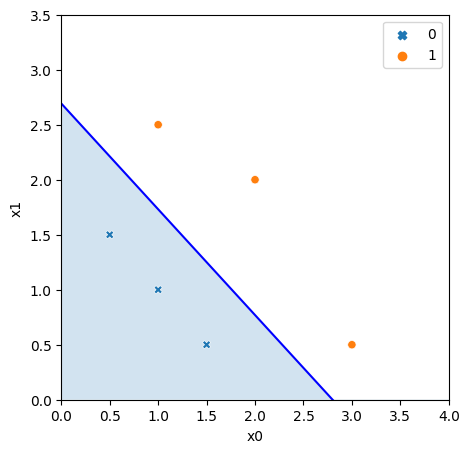

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis([0, 4, 0, 3.5])
x0 = np.arange(0,6)
x1 = - (w[1] * x0 + b) / w[0]
ax.plot(x0,x1, c="b")
ax.fill_between(x0,x1, alpha=0.2)
markers = {0: 'X', 1: 'o'}
plot = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y, style=y, markers=markers, ax = ax)
plot.set(xlabel ="x0", ylabel = "x1")

In [10]:
def prediction(x1, x2, w=w, b=b):
    x = np.array([x1, x2])
    z = np.dot(x, w) + b
    pred = 1/(1+np.exp(-z))
    print(f"Probability : {pred*100}%")
    return pred

In [12]:
prediction(1, 2.5)

Probability : 97.71169636712489%


0.9771169636712489